In [1]:
#import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
import numpy as np

In [2]:
def loadData():
    with np.load('notMNIST.npz') as data :
        Data, Target = data ['images'], data['labels']
        posClass = 2
        negClass = 9
        dataIndx = (Target==posClass) + (Target==negClass)
        Data = Data[dataIndx]/255.
        Target = Target[dataIndx].reshape(-1, 1)
        Target[Target==posClass] = 1
        Target[Target==negClass] = 0
        np.random.seed(421)
        randIndx = np.arange(len(Data))
        np.random.shuffle(randIndx)
        Data, Target = Data[randIndx], Target[randIndx]
        trainData, trainTarget = Data[:3500], Target[:3500]
        validData, validTarget = Data[3500:3600], Target[3500:3600]
        testData, testTarget = Data[3600:], Target[3600:]
    return trainData, validData, testData, trainTarget, validTarget, testTarget


In [91]:
'''Load and format data'''
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()

#Train Data 
train_X = trainData.reshape(3500,784)
X0 = np.ones((3500,1))
train_X = np.append(X0,train_X,axis=1)
train_Y = trainTarget
#print(train_X)
#Test Data
global test_X
test_X = testData.reshape(145,784)
X0 = np.ones((145,1))
test_X = np.append(X0,test_X,axis=1)
global test_Y 
test_Y = testTarget

#Validation Data
global validation_X
validation_X = validData.reshape(100,784)
X0 = np.ones((100,1))
validation_X = np.append(X0,validation_X,axis=1)
global validation_Y 
validation_Y = validTarget

#Initialize Weights
weight = np.random.rand(784,1)
bias = np.random.rand(1,1)

w_new = np.concatenate((bias,weight))
print(w_new.shape)

(785, 1)


In [4]:
def MSE(W, b, x, y, reg):
    N = x.shape[0]
    
    W_new = np.concatenate((b, W))
    LD = 0 
    for i in range(N) :
        LD = LD + (np.dot(W_new.T,x[i]) - y[i])**2
    LD = LD / (2*N)
    LW = (reg/2) * (np.dot(W_new.T,W_new))  
    total_loss = LD+LW
    return total_loss[0]

In [6]:
MSE(weight,bias,train_X,train_Y,0)

array([12022.79544809])

In [5]:
def grad_MSE(W,b,x,y,reg) :
    N = x.shape[0]
    W_new = np.concatenate((b, W))
    dLD = ((1/N)*(np.dot(np.dot(x.T,x),W_new) - np.dot(x.T,y)))
    dLW = reg*(W_new)
    # print(dLD.shape)
    # print(dLW.shape)
    # print(grad)
    grad = dLD + dLW
    return grad[1:], grad[0]
    # try

In [6]:
def grad_descent(W, b, trainingData, trainingLabels, alpha, iterations, reg, EPS):
    loss_train= []
    loss_validation= []
    iteration=[]
    W_final = W
    for i in range(iterations):
        loss = MSE(W,b,trainingData,trainingLabels,reg)
        loss_train.append(loss)
        iteration.append(i)
        #print()
        
        grad_val_weights,grad_val_bias = grad_MSE(W,b,trainingData,trainingLabels,reg)
        
        W = W - (alpha * grad_val_weights)
        b = b - (alpha * grad_val_bias)
        if i % 1 == 0 :
             loss_val = MSE(W,b,validation_X,validation_Y,reg)
             loss_validation.append(loss_val)
             print ("Iterations : " + str(i) +  "  Loss : " + str(loss) +" Validation Loss : " + str(loss_val))
        
        if i is 0 :
            least_loss = loss
            error = 0 
        else :
            error = prev - loss
            
        if loss <= least_loss :
            least_loss = loss 
            W_final = W
            b_final = b
        if error< EPS and i is not 0:
            print(error)
            break
        

        prev = loss
        
    
    loss_test = MSE(W,b,test_X,test_Y,reg)
    #plot_print_loss(iterations, loss_train,loss_validation,loss_test)
    return b , W, loss_train, loss_validation,loss_test, iteration
    

In [11]:
bias_finals , weights_final, loss_train1, loss_validation1,loss_test1, iterations = grad_descent(weight,bias,train_X,train_Y,alpha = 0.005, iterations=5000, reg=0.0, EPS=1e-7)

Iterations : 0  Loss : [12022.79544809] Validation Loss : [1444.56739418]
Iterations : 1  Loss : [1246.02641981] Validation Loss : [264.62836755]
Iterations : 2  Loss : [186.65273786] Validation Loss : [118.90776603]
Iterations : 3  Loss : [77.38410826] Validation Loss : [90.78205425]
Iterations : 4  Loss : [61.91479802] Validation Loss : [79.81329454]
Iterations : 5  Loss : [56.36743488] Validation Loss : [72.7715725]
Iterations : 6  Loss : [52.35881748] Validation Loss : [67.22695204]
Iterations : 7  Loss : [48.93482878] Validation Loss : [62.51640709]
Iterations : 8  Loss : [45.90689072] Validation Loss : [58.38372262]
Iterations : 9  Loss : [43.18871264] Validation Loss : [54.69779737]
Iterations : 10  Loss : [40.72290108] Validation Loss : [51.37640206]
Iterations : 11  Loss : [38.46792396] Validation Loss : [48.36119296]
Iterations : 12  Loss : [36.3928435] Validation Loss : [45.60792152]
Iterations : 13  Loss : [34.47407972] Validation Loss : [43.08177292]
Iterations : 14  Loss 

In [27]:
bias_finals , weights_final, loss_train2, loss_validation2,loss_test2, iterations = grad_descent(weight,bias,train_X,train_Y,alpha = 0.001, iterations=5000, reg=0.0, EPS=1e-7)

Iterations : 0  Loss : [12022.79544809] Validation Loss : [9518.99306392]
Iterations : 1  Loss : [8964.92905652] Validation Loss : [7159.62279825]
Iterations : 2  Loss : [6689.74820188] Validation Loss : [5396.79707685]
Iterations : 3  Loss : [4996.81905393] Validation Loss : [4078.78598331]
Iterations : 4  Loss : [3737.03991431] Validation Loss : [3092.56837396]
Iterations : 5  Loss : [2799.49454866] Validation Loss : [2353.94008706]
Iterations : 6  Loss : [2101.67252715] Validation Loss : [1800.15233499]
Iterations : 7  Loss : [1582.19424395] Validation Loss : [1384.43274452]
Iterations : 8  Loss : [1195.39913861] Validation Loss : [1071.9072808]
Iterations : 9  Loss : [907.31993199] Validation Loss : [836.56461677]
Iterations : 10  Loss : [692.68790255] Validation Loss : [658.99625894]
Iterations : 11  Loss : [532.70514211] Validation Loss : [524.71399942]
Iterations : 12  Loss : [413.38735874] Validation Loss : [422.89704747]
Iterations : 13  Loss : [324.33110347] Validation Loss :

In [7]:
bias_finals , weights_final, loss_train3, loss_validation3,loss_test3, iterations = grad_descent(weight,bias,train_X,train_Y,alpha = 0.0001, iterations=5000, reg=0.0, EPS=1e-7)

Iterations : 0  Loss : [12022.79544809] Validation Loss : [12342.13560702]
Iterations : 1  Loss : [11696.70227575] Validation Loss : [12014.72060448]
Iterations : 2  Loss : [11379.51056289] Validation Loss : [11696.14709028]
Iterations : 3  Loss : [11070.97720755] Validation Loss : [11386.17498232]
Iterations : 4  Loss : [10770.86574748] Validation Loss : [11084.57073546]
Iterations : 5  Loss : [10478.94617876] Validation Loss : [10791.10716325]
Iterations : 6  Loss : [10194.99477941] Validation Loss : [10505.56326456]
Iterations : 7  Loss : [9918.79393783] Validation Loss : [10227.72405494]
Iterations : 8  Loss : [9650.13198589] Validation Loss : [9957.38040257]
Iterations : 9  Loss : [9388.80303662] Validation Loss : [9694.32886868]
Iterations : 10  Loss : [9134.60682628] Validation Loss : [9438.37155236]
Iterations : 11  Loss : [8887.3485608] Validation Loss : [9189.31593954]
Iterations : 12  Loss : [8646.83876635] Validation Loss : [8946.97475618]
Iterations : 13  Loss : [8412.8931

In [8]:
bias_finals , weights_final, loss_train4, loss_validation4,loss_test4, iterations = grad_descent(weight,bias,train_X,train_Y,alpha = 0.005, iterations=5000, reg=0.0001, EPS=1e-7)

Iterations : 0  Loss : [12022.80907222] Validation Loss : [1444.56884457]
Iterations : 1  Loss : [1246.02826464] Validation Loss : [264.63203272]
Iterations : 2  Loss : [186.65666904] Validation Loss : [118.91194429]
Iterations : 3  Loss : [77.38846143] Validation Loss : [90.78624595]
Iterations : 4  Loss : [61.9191275] Validation Loss : [79.81741032]
Iterations : 5  Loss : [56.37167854] Validation Loss : [72.77560144]
Iterations : 6  Loss : [52.3629749] Validation Loss : [67.23089794]
Iterations : 7  Loss : [48.93890679] Validation Loss : [62.52027655]
Iterations : 8  Loss : [45.91089616] Validation Loss : [58.3875224]
Iterations : 9  Loss : [43.19265169] Validation Loss : [54.70153377]
Iterations : 10  Loss : [40.72677928] Validation Loss : [51.38008078]
Iterations : 11  Loss : [38.47174632] Validation Loss : [48.36481914]
Iterations : 12  Loss : [36.39661458] Validation Loss : [45.61149979]
Iterations : 13  Loss : [34.47780368] Validation Loss : [43.08530748]
Iterations : 14  Loss :

In [9]:
bias_finals , weights_final, loss_train5, loss_validation5,loss_test5, iterations = grad_descent(weight,bias,train_X,train_Y,alpha = 0.005, iterations=5000, reg=0.1, EPS=1e-7)

Iterations : 0  Loss : [12036.41957548] Validation Loss : [1446.01338693]
Iterations : 1  Loss : [1247.86668433] Validation Loss : [268.28570167]
Iterations : 2  Loss : [190.57574075] Validation Loss : [123.07293435]
Iterations : 3  Loss : [81.72384844] Validation Loss : [94.95613901]
Iterations : 4  Loss : [66.22634491] Validation Loss : [83.90733882]
Iterations : 5  Loss : [60.58903941] Validation Loss : [76.77486538]
Iterations : 6  Loss : [56.49020926] Validation Loss : [71.14342694]
Iterations : 7  Loss : [52.98295547] Validation Loss : [66.35276473]
Iterations : 8  Loss : [49.87870311] Validation Loss : [62.14681751]
Iterations : 9  Loss : [47.09046669] Validation Loss : [58.39400021]
Iterations : 10  Loss : [44.56021448] Validation Loss : [55.01148277]
Iterations : 11  Loss : [42.24587606] Validation Loss : [51.94034937]
Iterations : 12  Loss : [40.11605132] Validation Loss : [49.135841]
Iterations : 13  Loss : [38.14675354] Validation Loss : [46.56269365]
Iterations : 14  Loss 

In [10]:
bias_finals , weights_final, loss_train6, loss_validation6,loss_test6, iterations = grad_descent(weight,bias,train_X,train_Y,alpha = 0.005, iterations=5000, reg=0.5, EPS=1e-7)

Iterations : 0  Loss : [12090.91608505] Validation Loss : [1451.70962082]
Iterations : 1  Loss : [1255.13673823] Validation Loss : [282.75884164]
Iterations : 2  Loss : [206.10459326] Validation Loss : [139.47314397]
Iterations : 3  Loss : [98.81565025] Validation Loss : [111.30296764]
Iterations : 4  Loss : [83.11680015] Validation Loss : [99.8534038]
Iterations : 5  Loss : [77.03879957] Validation Loss : [92.28175016]
Iterations : 6  Loss : [72.50194939] Validation Loss : [86.22992138]
Iterations : 7  Loss : [68.58714762] Validation Loss : [81.04813124]
Iterations : 8  Loss : [65.10544399] Validation Loss : [76.48057754]
Iterations : 9  Loss : [61.96683109] Validation Loss : [72.3934851]
Iterations : 10  Loss : [59.11052405] Validation Loss : [68.70141989]
Iterations : 11  Loss : [56.4921228] Validation Loss : [65.3430095]
Iterations : 12  Loss : [54.07822054] Validation Loss : [62.27130769]
Iterations : 13  Loss : [51.84306328] Validation Loss : [59.44912621]
Iterations : 14  Loss :

In [25]:
def plot_print_loss(iterations, loss_train,loss_validation,loss_test) :
    plt.plot(iterations[200:], loss_train[200:])
    
    plt.plot(iterations[200:], loss_validation[200:])

    print("Test loss : "+str(loss_test))
    
    return

Test loss : [0.13007648]


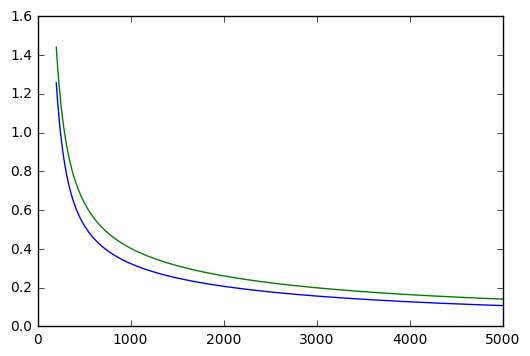

In [26]:
plot_print_loss(iterations,loss_train1,loss_validation1,loss_test1)

Test loss : [0.37279958]


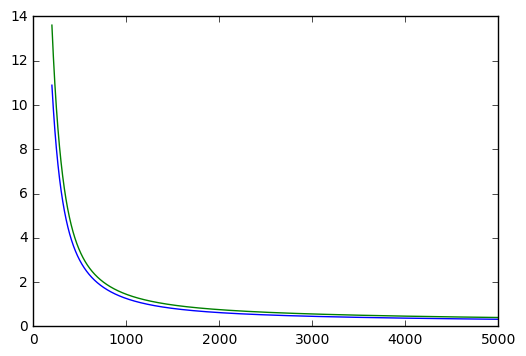

In [28]:
plot_print_loss(iterations,loss_train2,loss_validation2,loss_test2)

In [21]:
def closed_form(x,y,reg) :
    W = np.dot(x.T,x) - (reg * (np.identity(785))) 
    W_new=np.dot(np.dot((np.linalg.inv(W)),x.T),y)
    return W_new

In [22]:
W_opti = closed_form(train_X,train_Y,0)
N = train_X.shape[0]
reg = 0 
LD = 0 
for i in range(N) :
     LD = LD + (np.dot(W_opti.T,train_X[i]) - train_Y[i])**2
LD = LD / (2*N)
LW = (reg/2) * (np.dot(W_opti.T,W_opti))  
total_loss = LD+LW

print(total_loss)

[[0.00935203]]


In [77]:
class stochastic_gradient_descent() :
    def __init__(self,lr,lmd) :
        self.alpha = lr
        self.reg = lmd
        #self.init = tf.initialize_all_variables()
        

    def buildGraph(self,loss=None):
        tf.set_random_seed(421)
        self.weight = tf.Variable(tf.truncated_normal([784,1],stddev = 0.5))
        self.bias = tf.Variable(tf.truncated_normal([1,1]))
        self.X = tf.placeholder(tf.float32, shape=(None,784), name='train_X')
        self.Y = tf.placeholder(tf.float32, shape=(None,1), name='train_Y')
        self.reg = tf.placeholder(dtype=tf.float32, shape=(), name='lambda')

        if loss == "MSE":
            self.Y_pred = tf.matmul(self.X, self.weight)
            mse = tf.losses.mean_squared_error(labels = self.Y, predictions = self.Y_pred) 
            self.regularizer = tf.nn.l2_loss(self.weight)
            self.loss_total = tf.reduce_mean(mse + self.reg * self.regularizer)
            self.optimizer = tf.train.AdamOptimizer(self.alpha).minimize(self.loss_total)
        elif loss == "CE":
            self.Y_pred = tf.matmul(self.X,self.weight)
            self.ce = tf.losses.sigmoid_cross_entropy(multi_class_labels = self.Y, logits = self.Y_pred)
            self.regularizer = tf.nn.l2_loss(self.weight)
            self.loss_total = tf.reduce_mean(self.ce + self.reg * self.regularizer)
            self.optimizer = tf.train.AdamOptimizer(self.alpha).minimize(self.loss_total)


        return self.X,self.weight, self.bias, self.Y_pred, self.Y, self.loss_total, self.optimizer ,self.reg    

In [80]:

np.random.seed(421)
    
trainData, validData, testData, trainTarget, validTarget, testTarget = loadData()

train_X = trainData.reshape(3500,784)
train_Y = trainTarget
    
randIndx = np.arange(len(train_X))
np.random.shuffle(randIndx)
Image, Target = train_X[randIndx], train_Y[randIndx]

alpha = 0.001
reg_val = 0

lossfunc = stochastic_gradient_descent(alpha,reg_val)
    
mini_batch_size = 500
total_epochs = 700 
total_iterations =int(total_epochs * 3500 / mini_batch_size)

X,weight,bias, Y_pred, Y, loss_total, optimizer ,reg = lossfunc.buildGraph("CE")
init = tf.initialize_all_variables()
with tf.Session() as sess:

        sess.run(init)
        for iter in range(total_iterations) :
            image_up = Image[(iter*mini_batch_size)%3500:((iter*mini_batch_size)%3500)+mini_batch_size]
            target_up = Target[(iter*mini_batch_size)%3500:((iter*mini_batch_size)%3500)+mini_batch_size]
            _ , c = sess.run([optimizer,loss_total], feed_dict={X:image_up,Y:target_up,reg :0.0})
            #print(str(iter)+ " : " +str(c))
            print("iter:", '%04d' % (iter), "cost=", "{:.9f}".format(c))
            if iter%700 == 0 :
                randIndx = np.arange(len(train_X))
                np.random.shuffle(randIndx)
                Image, Target = train_X[randIndx], train_Y[randIndx]
    

iter: 0000 cost= 5.822768688
iter: 0001 cost= 5.949699402
iter: 0002 cost= 5.682100773
iter: 0003 cost= 5.497322559
iter: 0004 cost= 5.169128895
iter: 0005 cost= 5.419677734
iter: 0006 cost= 4.993512630
iter: 0007 cost= 5.244566441
iter: 0008 cost= 5.125821590
iter: 0009 cost= 4.824069500
iter: 0010 cost= 4.726996899
iter: 0011 cost= 4.437160969
iter: 0012 cost= 4.605709553
iter: 0013 cost= 4.195182800
iter: 0014 cost= 4.434802055
iter: 0015 cost= 4.338846684
iter: 0016 cost= 4.007899761
iter: 0017 cost= 3.993417025
iter: 0018 cost= 3.736426830
iter: 0019 cost= 3.828306675
iter: 0020 cost= 3.443674088
iter: 0021 cost= 3.665940046
iter: 0022 cost= 3.605639458
iter: 0023 cost= 3.253449678
iter: 0024 cost= 3.313213587
iter: 0025 cost= 3.086229563
iter: 0026 cost= 3.107764959
iter: 0027 cost= 2.766638994
iter: 0028 cost= 2.968165874
iter: 0029 cost= 2.953038931
iter: 0030 cost= 2.605113268
iter: 0031 cost= 2.723728657
iter: 0032 cost= 2.523364544
iter: 0033 cost= 2.488252640
iter: 0034 cos

In [118]:
def crossEntropyLoss(W, b, x, y, reg):
    N = x.shape[0]
    LD = 0
    W_new = np.concatenate((b, W))
    for i in range(N) :
        z =  np.dot(W_new.T,x[i]) 
        sig = np.exp(z) /( 1.0 + np.exp(z))
        LD = LD + (-1*y[i]*np.log(sig)) - ((1 - y[i])*np.log(1-sig))
    LW = (reg/2) * np.dot(W_new.T,W_new)
    loss = LW + LD
    return loss[0]

In [27]:
W = np.zeros((784,1))
b = np.zeros((1,1))
loss = crossEntropyLoss(W,b,train_X,train_Y,0)
print(loss)

[2426.01513196]


In [88]:
def gradCE(W, b, x, y, reg):
    W_new = np.concatenate((b, W))
    dLD = 0 
    for i in range(x.shape[0]) :
        z = np.dot(W_new.T,x[i])
        l1 = 1.0/(1.0+ np.exp(-1*z))
        dLD += ((l1 - y[i])*x[i])
    dLW = reg*(W_new)
    # print(dLD.shape)
    # print(dLW.shape)
    # print(grad)
    grad = dLD.reshape(785,1) + dLW
    
    return grad[1:], grad[0]

In [85]:
W = np.zeros((784,1))
b = np.zeros((1,1))

w,b = gradCE(W,b,train_X,train_Y,0)
print(w.shape)

(785, 1)
(784, 1)


In [119]:
def grad_descent(W, b, trainingData, trainingLabels, alpha, iterations, reg, EPS):
    loss_train= []
    loss_validation= []
    iteration=[]
    W_final = W
    for i in range(iterations):
        loss = crossEntropyLoss(W,b,trainingData,trainingLabels,reg)
        loss_train.append(loss)
        iteration.append(i)
        
        grad_val_weights,grad_val_bias = gradCE(W,b,trainingData,trainingLabels,reg)
        
        W = W - (alpha * grad_val_weights)
        b = b - (alpha * grad_val_bias)
        if i % 1 == 0 :
             #loss_val = crossEntropyLoss(W,b,validation_X,validation_Y,reg)
             #loss_validation.append(loss_val)
             print ("Iterations : " + str(i) +  "  Loss : " + str(loss) +" Validation Loss : " + str(0))
        
        if i is 0 :
            least_loss = loss
            error = 0 
        else :
            error = prev - loss
            
        if loss <= least_loss :
            least_loss = loss 
            W_final = W
            b_final = b
        if error< EPS and i is not 0:
            print(error)
            break
        

        prev = loss
        
    
    #loss_test = crossEntropyLoss(W,b,test_X,test_Y,reg)
    #plot_print_loss(iterations, loss_train,loss_validation,loss_test)
    return b , W, loss_train, loss_validation,0, iteration
    

In [120]:
normalized_test_array = train_X / np.linalg.norm(train_X)
bias_finals , weights_final, loss_train1, loss_validation1,loss_test1, iterations = grad_descent(weights,bias,normalized_test_array,train_Y,alpha = 0.005, iterations=50, reg=0.1, EPS=1e-7)

Iterations : 0  Loss : [2426.01629459] Validation Loss : 0
Iterations : 1  Loss : [2425.53022394] Validation Loss : 0
Iterations : 2  Loss : [2425.04481252] Validation Loss : 0
Iterations : 3  Loss : [2424.56005943] Validation Loss : 0
Iterations : 4  Loss : [2424.07596376] Validation Loss : 0
Iterations : 5  Loss : [2423.59252463] Validation Loss : 0
Iterations : 6  Loss : [2423.10974112] Validation Loss : 0
Iterations : 7  Loss : [2422.62761236] Validation Loss : 0
Iterations : 8  Loss : [2422.14613745] Validation Loss : 0
Iterations : 9  Loss : [2421.66531548] Validation Loss : 0
Iterations : 10  Loss : [2421.18514558] Validation Loss : 0
Iterations : 11  Loss : [2420.70562686] Validation Loss : 0
Iterations : 12  Loss : [2420.22675841] Validation Loss : 0
Iterations : 13  Loss : [2419.74853937] Validation Loss : 0
Iterations : 14  Loss : [2419.27096883] Validation Loss : 0
Iterations : 15  Loss : [2418.79404592] Validation Loss : 0
Iterations : 16  Loss : [2418.31776975] Validation